In [0]:
import numpy as np


**Using MNIST dataset**

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


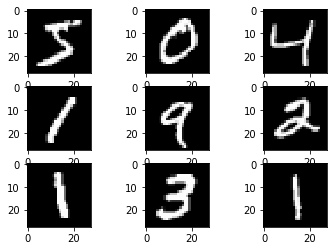

In [4]:

import matplotlib.pyplot as plt
# create a grid of 3x3 images
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

**Image Auementation**


**Feature Standardization**

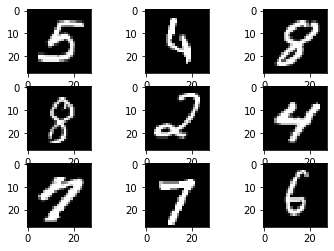

In [33]:
from keras.preprocessing.image import ImageDataGenerator
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# reshape to be [samples][width][height][channels]
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size = 9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

***Code Whitening***

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


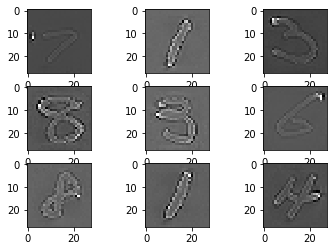

In [34]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

***Random Rotations***

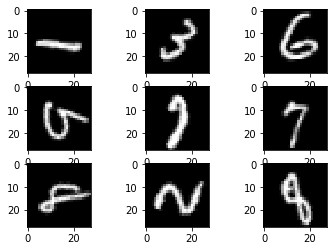

In [35]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

***Random Shifts***

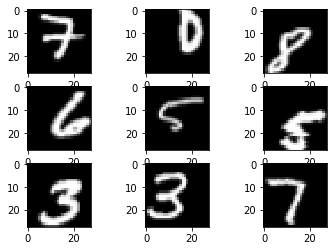

In [36]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

***Random Flips***

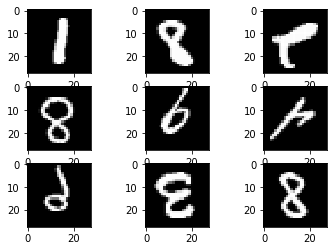

In [37]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

***Saving augmented images to file***

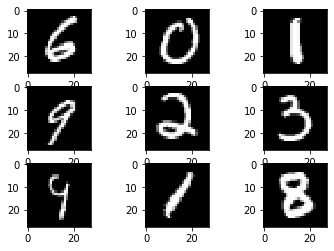

In [42]:
import os
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
os.makedirs('images1')
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, save_to_dir='images1', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [43]:
x_train.shape

(60000, 28, 28, 1)

In [44]:
y_train.shape

(60000,)

In [45]:
x_test.shape

(10000, 28, 28, 1)

***Normalizing the pixel data***

In [0]:
images, labels = x_train.reshape(x_train.shape[0], 28*28)/255, y_train

In [47]:
x_train[:1].shape

(1, 28, 28, 1)

In [48]:
images.shape

(60000, 784)

***one hot encoding of labels***

In [0]:

one_hot_labels = np.zeros((len(labels), 10))

In [50]:
one_hot_labels[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
for i , l in enumerate(labels):
    one_hot_labels[i][l] = 1

In [0]:
labels = one_hot_labels

In [53]:
labels[:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

***Normalizing and one hot encoding labels for test data***

In [0]:
test_images, test_labels = x_test.reshape(x_test.shape[0], 28*28)/255, y_test

one_hot_labels_test = np.zeros((len(test_labels), 10))

for i , l in enumerate(test_labels):
    one_hot_labels_test[i][l] = 1
test_labels = one_hot_labels_test

**helper functions for various activations**

In [0]:
def relu(x):
    return (x >= 0) * x

In [0]:
def relu2deriv(output):
    return output >= 0

In [0]:
def softmax(x):
    return np.exp(x) / (np.sum(np.exp(x), axis = 1, keepdims = True ))

**alpha is learning rate, 1 hidden layer with 100 neurons**

In [0]:
alpha, iterations, hidden_size = (0.2, 300, 100)
pixels_per_image, num_of_labels  =  784 , 10
batch_size = 100  ## using mini -batch to train the model

**weight initialization randomly**

In [0]:
weights_0_1 = 0.02* np.random.random((pixels_per_image, hidden_size)) - 0.01
weights_1_2 = 0.02* np.random.random((hidden_size,hidden_size )) - 0.01
weights_1_3 = 0.2* np.random.random((hidden_size,num_of_labels )) - 0.1

In [67]:
for j in range(iterations):
  
    correct_cnt = 0
    
    ## training phase
    for i in range(int(len(images) / batch_size)):
      
        batch_start, batch_end = (( i * batch_size), ((i+1)* batch_size))
        
        ## input layer
        layer_0 = images[batch_start:batch_end]
        
        ## hidden layer with relu non -linearity
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        
        layer_2 = relu(np.dot(layer_1, weights_1_2))
        
        ## adding drop_out to address overfitting
        drop_out_mask = np.random.randint(2, size = layer_2.shape)
        
        layer_2 *= drop_out_mask * 2
        
        ## output layer with relu activation
        layer_3 = relu2deriv(np.dot(layer_2, weights_1_3))
        
        
        ## calculating accuracy in each batch
        for k in range(batch_size ):
          
            correct_cnt += int( np.argmax(layer_3[k:k+1]) ==  np.argmax(labels[batch_start + k: batch_start + k+ 1]) )
            
        ## optimization using gradient descent
        layer_3_delta = (labels[batch_start : batch_end] - layer_3 ) / (batch_size * layer_3.shape[0])
        
        layer_2_delta = layer_3_delta.dot(weights_1_3.T) * relu2deriv(layer_2)
          
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
          
        #layer_1_delta *= drop_out_mask
        
        ## updating weights 
        weights_1_3 += alpha * layer_2.T.dot(layer_3_delta)
        
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        
    ## validation phase
    test_correct_cnt = 0 
    
    for i in range(len(test_images)):
        layer_0 = test_images[i:i+1] ## input layer
        
        layer_1 = relu( np.dot(layer_0, weights_0_1)) ## hidden layer
        
        layer_2 = relu(np.dot(layer_1, weights_1_2) )
        
        layer_3 = np.dot(layer_2, weights_1_3)  ## output layer
        
        test_correct_cnt += int( np.argmax(layer_3) ==  np.argmax(test_labels[i: i+ 1]))
  
  
    if(j % 10 ==0):
        print("epoch: " + str(j) + " Train acc: " + str(correct_cnt / float(len(images)))  + " Test acc: " + str(test_correct_cnt / float(len(test_images))))
          

epoch: 0 Train acc: 0.13621666666666668 Test acc: 0.3651
epoch: 10 Train acc: 0.4018 Test acc: 0.8268
epoch: 20 Train acc: 0.484 Test acc: 0.8572
epoch: 30 Train acc: 0.5366666666666666 Test acc: 0.8724
epoch: 40 Train acc: 0.5839 Test acc: 0.8798
epoch: 50 Train acc: 0.62225 Test acc: 0.888
epoch: 60 Train acc: 0.6497666666666667 Test acc: 0.8893
epoch: 70 Train acc: 0.6792 Test acc: 0.8899
epoch: 80 Train acc: 0.69745 Test acc: 0.8927
epoch: 90 Train acc: 0.7089833333333333 Test acc: 0.8937
epoch: 100 Train acc: 0.71535 Test acc: 0.8942
epoch: 110 Train acc: 0.7178166666666667 Test acc: 0.8968
epoch: 120 Train acc: 0.71865 Test acc: 0.898
epoch: 130 Train acc: 0.72245 Test acc: 0.8984
epoch: 140 Train acc: 0.7219 Test acc: 0.8978
epoch: 150 Train acc: 0.7252666666666666 Test acc: 0.8994
epoch: 160 Train acc: 0.7205166666666667 Test acc: 0.9
epoch: 170 Train acc: 0.7203166666666667 Test acc: 0.8981
epoch: 180 Train acc: 0.7210833333333333 Test acc: 0.8948
epoch: 190 Train acc: 0.72243